In [1]:
import tensorflow as tf
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt


print(tf.__version__)
tf.keras.mixed_precision.set_global_policy('mixed_float16')

In [2]:
# Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
dataset = tf.data.Dataset.range(10)

# Preview the result
for val in dataset:
    print(val.numpy(), end=" ")

0 1 2 3 4 5 6 7 8 9 

In [3]:
# Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
dataset = tf.data.Dataset.range(10)

# Window the data
dataset = dataset.window(size=5, shift=1)

# Print the result
for window_dataset in dataset:
    print(window_dataset)
    print([i.numpy() for i in window_dataset])
    print()

<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
[0, 1, 2, 3, 4]

<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
[1, 2, 3, 4, 5]

<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
[2, 3, 4, 5, 6]

<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
[3, 4, 5, 6, 7]

<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
[4, 5, 6, 7, 8]

<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
[5, 6, 7, 8, 9]

<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
[6, 7, 8, 9]

<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
[7, 8, 9]

<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
[8, 9]

<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
[9]



In [4]:
# Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
dataset = tf.data.Dataset.range(10)

# Window the data but only take those with the specified size
dataset = dataset.window(size=5, shift=1, drop_remainder=True)

# Print the result
for window_dataset in dataset:
    print(window_dataset)
    print([i.numpy() for i in window_dataset])
    print()

<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
[0, 1, 2, 3, 4]

<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
[1, 2, 3, 4, 5]

<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
[2, 3, 4, 5, 6]

<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
[3, 4, 5, 6, 7]

<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
[4, 5, 6, 7, 8]

<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
[5, 6, 7, 8, 9]



In [5]:
# Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
dataset = tf.data.Dataset.range(10)

# Window the data but only take those with the specified size
dataset = dataset.window(5, shift=1, drop_remainder=True)

# Flatten the windows by putting its elements in a single batch
dataset = dataset.flat_map(lambda window: window.batch(5))

# Print the results
for window in dataset:
    print(window.numpy())

[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]
[5 6 7 8 9]


In [6]:
# Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
dataset = tf.data.Dataset.range(10)

# Window the data but only take those with the specified size
dataset = dataset.window(5, shift=1, drop_remainder=True)

# Flatten the windows by putting its elements in a single batch
dataset = dataset.flat_map(lambda window: window.batch(5))

# Create tuples with features (first four elements of the window) and labels (last element)
dataset = dataset.map(lambda window: (window[:-1], window[-1]))

# Print the results
for x,y in dataset:
    print("x = ", x.numpy())
    print("y = ", y.numpy())
    print()

x =  [0 1 2 3]
y =  4

x =  [1 2 3 4]
y =  5

x =  [2 3 4 5]
y =  6

x =  [3 4 5 6]
y =  7

x =  [4 5 6 7]
y =  8

x =  [5 6 7 8]
y =  9



In [7]:
# Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
dataset = tf.data.Dataset.range(10)

# Window the data but only take those with the specified size
dataset = dataset.window(5, shift=1, drop_remainder=True)

# Flatten the windows by putting its elements in a single batch
dataset = dataset.flat_map(lambda window: window.batch(5))

# Create tuples with features (first four elements of the window) and labels (last element)
dataset = dataset.map(lambda window: (window[:-1], window[-1]))

# Shuffle the windows
dataset = dataset.shuffle(buffer_size=5)

# Print the results
for x,y in dataset:
    print("x = ", x.numpy())
    print("y = ", y.numpy())
    print()

x =  [0 1 2 3]
y =  4

x =  [3 4 5 6]
y =  7

x =  [2 3 4 5]
y =  6

x =  [5 6 7 8]
y =  9

x =  [1 2 3 4]
y =  5

x =  [4 5 6 7]
y =  8



In [8]:
# Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
dataset = tf.data.Dataset.range(10)

# Window the data but only take those with the specified size
dataset = dataset.window(5, shift=1, drop_remainder=True)

# Flatten the windows by putting its elements in a single batch
dataset = dataset.flat_map(lambda window: window.batch(5))

# Create tuples with features (first four elements of the window) and labels (last element)
dataset = dataset.map(lambda window: (window[:-1], window[-1]))

# Shuffle the windows
dataset = dataset.shuffle(buffer_size=10)

# Create batches of windows
dataset = dataset.batch(2).prefetch(1)

# Print the results
for x,y in dataset:
    print("x = ", x.numpy())
    print("y = ", y.numpy())
    print()

x =  [[1 2 3 4]
 [4 5 6 7]]
y =  [5 8]

x =  [[5 6 7 8]
 [3 4 5 6]]
y =  [9 7]

x =  [[2 3 4 5]
 [0 1 2 3]]
y =  [6 4]



In [9]:
def plot_series(time, series, format="-", start=0, end=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format - line style when plotting the graph
      label - tag for the line
      start - first time step to plot
      end - last time step to plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))
    
    if type(series) is tuple:

        for series_num in series:
            # Plot the time series data
            plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()


def trend(time, slope=0):
    """
    Generates synthetic data that follows a straight line given a slope value.

    Args:
      time (array of int) - contains the time steps
      slope (float) - determines the direction and steepness of the line

    Returns:
      series (array of float) - measurements that follow a straight line
    """

    # Compute the linear series given the slope
    series = slope * time

    return series


def seasonal_pattern(season_time):
    """
    Just an arbitrary pattern, you can change it if you wish
    
    Args:
      season_time (array of float) - contains the measurements per time step

    Returns:
      data_pattern (array of float) -  contains revised measurement values according 
                                  to the defined pattern
    """

    # Generate the values using an arbitrary pattern
    data_pattern = np.where(season_time < 0.4, np.cos(season_time * 2 * np.pi), 1 / np.exp(3 * season_time))
    
    return data_pattern


def seasonality(time, period, amplitude=1, phase=0):
    """
    Repeats the same pattern at each period

    Args:
      time (array of int) - contains the time steps
      period (int) - number of time steps before the pattern repeats
      amplitude (int) - peak measured value in a period
      phase (int) - number of time steps to shift the measured values

    Returns:
      data_pattern (array of float) - seasonal data scaled by the defined amplitude
    """
    
    # Define the measured values per period
    season_time = ((time + phase) % period) / period

    # Generates the seasonal data scaled by the defined amplitude
    data_pattern = amplitude * seasonal_pattern(season_time)

    return data_pattern


def noise(time, noise_level=1, seed=None):
    """Generates a normally distributed noisy signal

    Args:
      time (array of int) - contains the time steps
      noise_level (float) - scaling factor for the generated signal
      seed (int) - number generator seed for repeatability

    Returns:
      noise (array of float) - the noisy signal
    """

    # Initialize the random number generator
    rnd = np.random.RandomState(seed)

    # Generate a random number for each time step and scale by the noise level
    noise = rnd.randn(len(time)) * noise_level
    
    return noise

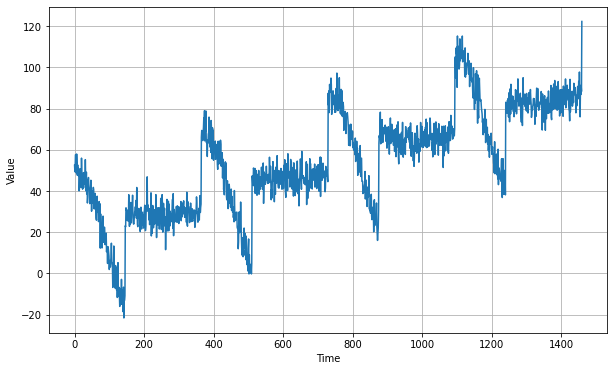

In [10]:
# Parameters
time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

# Update with noise
series += noise(time, noise_level, seed=42)

# Plot the results
plot_series(time, series)

(1168,) (293,) (1168,) (293,)


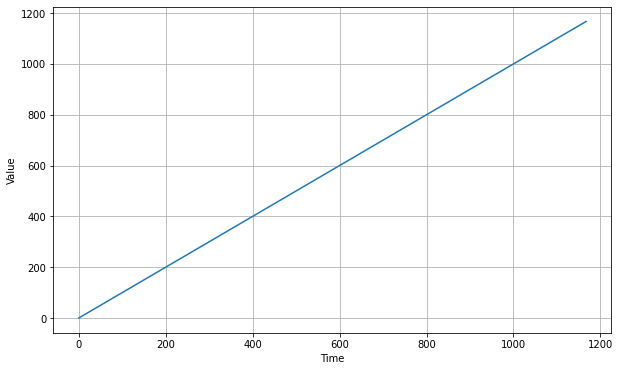

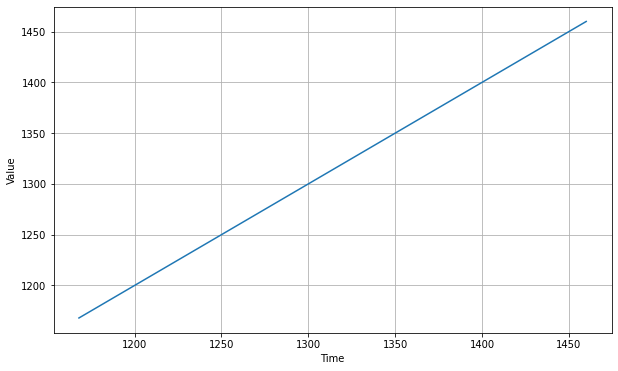

In [11]:
split_ratio = 0.2
def series_splitter(series, test_ratio=0.2):
    total = len(series)
    train_size = int(total - (total * test_ratio))
    train_data = time[:train_size]
    test_data = time[train_size:]
    return train_size, train_data, test_data
    
# Get the train set 
_, time_train, time_valid = series_splitter(time, split_ratio)
split_time, x_train, x_valid = series_splitter(series, split_ratio)
print(time_train.shape, time_valid.shape, x_train.shape, x_valid.shape)


# Plot the train set
plot_series(time_train, x_train)


# Plot the validation set
plot_series(time_valid, x_valid)

In [25]:
WINDOW_SIZE = 21
BUFFER_SIZE=500
BATCH_SIZE = 32
EPOCHS = 500
PATIENCE = 5
MONITOR = 'val_loss'

In [13]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer, look_forward=1):
    """Generates dataset windows

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the feature
      batch_size (int) - the batch size
      shuffle_buffer(int) - buffer size to use for the shuffle method

    Returns:
      dataset (TF Dataset) - TF Dataset containing time windows
    """
  
    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)
    
    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=look_forward, drop_remainder=True)
    
    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels 
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows
    dataset = dataset.shuffle(shuffle_buffer)
    
    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    
    return dataset

# Generate the dataset windows
train_dataset = windowed_dataset(x_train, WINDOW_SIZE, BATCH_SIZE, BUFFER_SIZE)
test_dataset = windowed_dataset(x_valid, WINDOW_SIZE, BATCH_SIZE, BUFFER_SIZE)
# Print properties of a single batch
for windows in dataset.take(1):
    print(f'data type: {type(windows)}')
    print(f'number of elements in the tuple: {len(windows)}')
    print(f'shape of first element (train features): {windows[0].shape}')
    print(f'shape of second element (taing target): {windows[1].shape}')

data type: <class 'tuple'>
number of elements in the tuple: 2
shape of first element (train features): (2, 4)
shape of second element (taing target): (2,)


In [31]:
MODEL_NAME = './models/LinearPred_TimeSeriesUniVer_full_verse.h5'

# Build the single layer neural network
l0 = tf.keras.layers.Dense(1, input_shape=[WINDOW_SIZE])
model = tf.keras.models.Sequential([l0])

# Print the initial layer weights
print("Layer weights: \n {} \n".format(l0.get_weights()))

# Setup the training parameters
model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Nadam(1e-5),
    # optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9),
    # optimizer=tf.keras.optimizers.Adam(1e-4),
    metrics=['mae', 'mse', tf.keras.metrics.RootMeanSquaredError()]
)

# Print the model summary
model.summary()

Layer weights: 
 [array([[ 0.137065  ],
       [-0.34526396],
       [-0.45255154],
       [ 0.06483215],
       [ 0.18783396],
       [-0.35896146],
       [ 0.4508323 ],
       [ 0.2373597 ],
       [ 0.34890127],
       [ 0.1576134 ],
       [ 0.39071298],
       [-0.45511743],
       [ 0.2981094 ],
       [ 0.43975753],
       [-0.09741816],
       [-0.07446486],
       [ 0.31183302],
       [-0.00712419],
       [-0.30694425],
       [-0.08142397],
       [ 0.46705645]], dtype=float32), array([0.], dtype=float32)] 

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 22        
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


Epoch 1/500
36/36 [==============================] - 1s 11ms/step - loss: 40773.4531 - mae: 174.6686 - mse: 40773.4531 - root_mean_squared_error: 201.9244 - val_loss: 155751.1094 - val_mae: 393.9327 - val_mse: 155751.1094 - val_root_mean_squared_error: 394.6531 - lr: 1.0000e-05
Epoch 2/500
36/36 [==============================] - 0s 7ms/step - loss: 38760.7148 - mae: 170.2205 - mse: 38760.7148 - root_mean_squared_error: 196.8774 - val_loss: 148432.1406 - val_mae: 384.5652 - val_mse: 148432.1406 - val_root_mean_squared_error: 385.2689 - lr: 1.0000e-05
Epoch 3/500
36/36 [==============================] - 0s 8ms/step - loss: 36939.7891 - mae: 166.1355 - mse: 36939.7891 - root_mean_squared_error: 192.1973 - val_loss: 141515.7500 - val_mae: 375.4983 - val_mse: 141515.7500 - val_root_mean_squared_error: 376.1858 - lr: 1.0000e-05
Epoch 4/500
36/36 [==============================] - 0s 7ms/step - loss: 35204.4570 - mae: 162.1711 - mse: 35204.4570 - root_mean_squared_error: 187.6285 - val_loss:

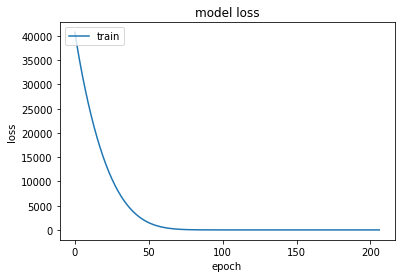

In [32]:
callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor=MONITOR, factor=0.1, patience=PATIENCE, min_lr=1e-6)]
callbacks += [tf.keras.callbacks.ModelCheckpoint(MODEL_NAME, monitor=MONITOR, save_best_only=True)]
callbacks += [tf.keras.callbacks.EarlyStopping(monitor=MONITOR, patience=PATIENCE*2, restore_best_weights=True)]

history = model.fit(
    train_dataset,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=test_dataset,
    callbacks=callbacks
)

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
# Print the layer weights
print("Layer weights {}".format(l0.get_weights()))

Layer weights [array([[ 0.12243542],
       [-0.3598897 ],
       [-0.4671744 ],
       [ 0.0502127 ],
       [ 0.17321676],
       [-0.37357467],
       [ 0.436222  ],
       [ 0.2227535 ],
       [ 0.334296  ],
       [ 0.14301406],
       [ 0.37611535],
       [-0.4697122 ],
       [ 0.28351828],
       [ 0.42516866],
       [-0.11200163],
       [-0.08904503],
       [ 0.2972559 ],
       [-0.02169788],
       [-0.32151535],
       [-0.0959912 ],
       [ 0.45249203]], dtype=float32), array([-0.01172202], dtype=float32)]


In [34]:
# Shape of the first 20 data points slice
print(f'shape of series[0:20]: {series[0:WINDOW_SIZE].shape}')

# Shape after adding a batch dimension
print(f'shape of series[0:20][np.newaxis]: {series[0:WINDOW_SIZE][np.newaxis].shape}')

# Shape after adding a batch dimension (alternate way)
print(f'shape of series[0:20][np.newaxis]: {np.expand_dims(series[0:WINDOW_SIZE], axis=0).shape}')

# Sample model prediction
print(f'model prediction: {model.predict(series[0:WINDOW_SIZE][np.newaxis])}')

shape of series[0:20]: (21,)
shape of series[0:20][np.newaxis]: (1, 21)
shape of series[0:20][np.newaxis]: (1, 21)
1/1 [==============================] - 0s 25ms/step
model prediction: [[55.029354]]


length of the forecast list: 293
shape of the validation set: (293,)
shape after converting to numpy array: (293, 1, 1)
shape after squeezing: (293,)


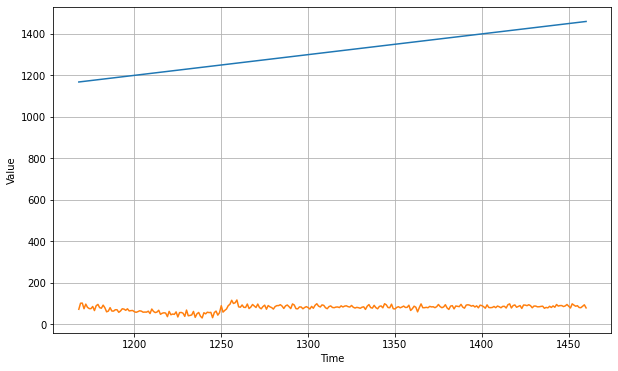

1534509.5
1236.27


In [35]:
# Initialize a list
forecast = []

# Use the model to predict data points per window size
for time in range(len(series) - WINDOW_SIZE):
    forecast.append(model.predict(series[time:time + WINDOW_SIZE][np.newaxis], verbose=0))

# Slice the points that are aligned with the validation set
forecast = forecast[split_time - WINDOW_SIZE:]

# Compare number of elements in the predictions and the validation set
print(f'length of the forecast list: {len(forecast)}')
print(f'shape of the validation set: {x_valid.shape}')


# Preview shapes after using the conversion and squeeze methods
print(f'shape after converting to numpy array: {np.array(forecast).shape}')
print(f'shape after squeezing: {np.array(forecast).squeeze().shape}')

# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()

# Overlay the results with the validation set
plot_series(time_valid, (x_valid, results))


# Compute the metrics
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())